## Dataset download

In [ ]:
!gdown 13REOYVQMubUmtn6VGE5zbXIyeHZsh_pl

Downloading...
From: https://drive.google.com/uc?id=13REOYVQMubUmtn6VGE5zbXIyeHZsh_pl
To: /content/png2_originsize_dataset.zip
100% 5.70G/5.70G [00:52<00:00, 108MB/s]


In [ ]:
!unzip /content/png2_originsize_dataset.zip

## Import libray

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import cv2

from PIL import Image
from tqdm.notebook import tqdm
from glob import glob
from itertools import product

In [ ]:
!mkdir /content/2048_crop_dataset
!mkdir /content/2048_crop_dataset/images
!mkdir /content/2048_crop_dataset/multi_masks
!mkdir /content/2048_crop_dataset/binary_masks

## Crop original size image to 2048 x 2048 size

In [ ]:
img_path = '/content/png2_originsize_dataset/images/'
binary_mask_path = '/content/png2_originsize_dataset/binary_masks/'
multi_mask_path = '/content/png2_originsize_dataset/multi_masks/'

img_name_list = os.listdir(img_path)

for img in tqdm(img_name_list):
    name = img.split('.')[0]
    mask_img = name + '.png'

    origin_img = Image.open(img_path + img)
    binary_mask_img = Image.open(binary_mask_path + img)
    multi_mask_img = Image.open(multi_mask_path + img)

    h, w = origin_img.size
    crop_start_x = (h - 2048) / 2
    crop_start_y = (w - 2048) / 2
    crop_end_x = 2048 + crop_start_x
    crop_end_y = 2048 + crop_start_y

    crop_img = origin_img.crop((crop_start_x, crop_start_y, crop_end_x, crop_end_y))
    crop_binary_mask = binary_mask_img.crop((crop_start_x, crop_start_y, crop_end_x, crop_end_y))
    crop_multi_mask = multi_mask_img.crop((crop_start_x, crop_start_y, crop_end_x, crop_end_y))

    crop_img.save(f'/content/2048_crop_dataset/images/{name}.png')
    crop_binary_mask.save(f'/content/2048_crop_dataset/binary_masks/{name}.png')
    crop_multi_mask.save(f'/content/2048_crop_dataset/multi_masks/{name}.png')

  0%|          | 0/351 [00:00<?, ?it/s]

## Check dataset Function

In [ ]:
def cheak_img_data(path, check_num):

    img_len = len(os.listdir(path + '/images'))
    bin_len = len(os.listdir(path + '/binary_masks'))
    mul_len = len(os.listdir(path + '/multi_masks'))

    image = cv2.imread(path + f'/images/{check_num}.png')

    bin_mask = cv2.imread(path + f'/binary_masks/{check_num}.png')
    mul_mask = cv2.imread(path + f'/multi_masks/{check_num}.png')

    plt.figure(figsize=(10, 30))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.imshow(bin_mask * 255)
    plt.subplot(1, 3, 3)
    plt.imshow(mul_mask * 20)
    plt.show()

### Check dataset

Image len : 351, Binary len : 351, Multi len : 351


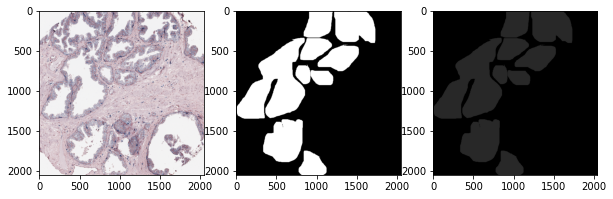

In [ ]:
cheak_img_data('/content/2048_crop_dataset', '10044')

### zip

In [ ]:
!zip 2048_crop_dataset.zip -r ./2048_crop_dataset

# Make crop dataset

In [ ]:
img_name_list = os.listdir('/content/2048_crop_dataset/images')
name_list = []
for name in img_name_list:
    name_list.append(name.split('.')[0])

In [ ]:
def image_crop(data_path, save_path, crop_num):

    img_name_list = os.listdir(data_path + '/images')
    
    for names in name_list:
        name = names.split('.')[0]
        origin_img = Image.open(data_path + f'/images/{name}.png')
        origin_multi_mask = Image.open(data_path + f'/binary_masks/{name}.png')
        origin_binary_mask = Image.open(data_path + f'/multi_masks/{name}.png')

        x, y = origin_img.size

        x_crop_size = x / crop_num
        y_crop_size = y / crop_num

        point_num = range(crop_num)
        points = product(point_num, point_num)
        
        num = 1
        for a, b in points:
            crop_img = origin_img.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))
            crop_multi_mask = origin_multi_mask.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))
            crop_binary_mask = origin_binary_mask.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))
            
            crop_img.save(save_path + f'/images/{name}_{num:03d}.png')
            crop_multi_mask.save(save_path + f'/binary_masks/{name}_{num:03d}.png')
            crop_binary_mask.save(save_path + f'/multi_masks/{name}_{num:03d}.png')

            num += 1

    print('=====>Done<=====')

## Crop 2048x2048 size image to partition 512x512 size image

In [ ]:
!mkdir /content/all_512x512_partition_dataset

!mkdir /content/all_512x512_partition_dataset/images
!mkdir /content/all_512x512_partition_dataset/binary_masks
!mkdir /content/all_512x512_partition_dataset/multi_masks

In [ ]:
origin_data_path = '/content/2048_crop_dataset'
save_data_path = '/content/512x512_partition_dataset'

image_crop(origin_data_path, save_data_path, 4)

=====>Done<=====


### Check dataset

Image len : 5616, Binary len : 5616, Multi len : 5616
10044_001
/content/512x512_partition_dataset/images/10044_001.png


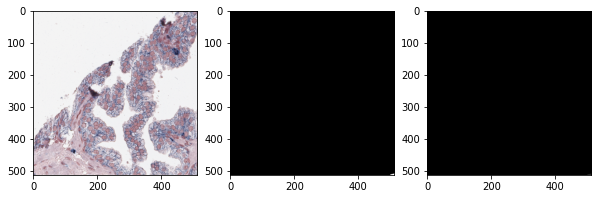

In [ ]:
cheak_img_data('/content/512x512_partition_dataset', '10044_001')

### zip

In [ ]:
!zip all_512x512_partition_dataset.zip -r ./all_512x512_partition_dataset

## Crop 2048x2048 size image to partition 256x256 size image

In [ ]:
!mkdir /content/all_256x256_partition_dataset

!mkdir /content/all_256x256_partition_dataset/images
!mkdir /content/all_256x256_partition_dataset/binary_masks
!mkdir /content/all_256x256_partition_dataset/multi_masks

In [ ]:
origin_data_path = '/content/2048_crop_dataset'
save_data_path = '/content/exist_512x512_partition_dataset'

image_crop(origin_data_path, save_data_path, 8)

=====>Done<=====


### Check dataset

Image len : 22464, Binary len : 22464, Multi len : 22464
10044_011
/content/all_256x256_partition_dataset/images/10044_011.png


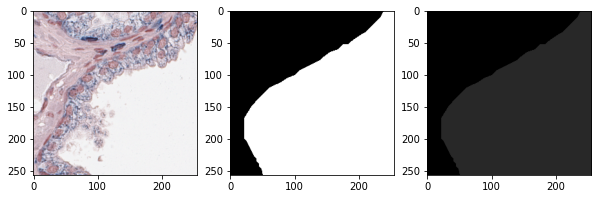

In [ ]:
cheak_img_data('/content/all_256x256_partition_dataset', '10044_011')

### zip

In [ ]:
!zip all_256x256_partition_dataset.zip -r ./all_256x256_partition_dataset

## Crop 2048x2048 size image to partition 768x768 size image

In [ ]:
def image_overlap_crop(data_path, save_path, crop_num):

    img_name_list = os.listdir(data_path + '/images')
    
    for names in name_list:
        name = names.split('.')[0]
        origin_img = Image.open(data_path + f'/images/{name}.png')
        origin_multi_mask = Image.open(data_path + f'/binary_masks/{name}.png')
        origin_binary_mask = Image.open(data_path + f'/multi_masks/{name}.png')

        x, y = origin_img.size

        x_crop_size = x / crop_num
        y_crop_size = y / crop_num

        point_num = range(crop_num)
        points = product(point_num, point_num)
        
        num = 1
        for a, b in points:
            crop_img = origin_img.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))
            crop_multi_mask = origin_multi_mask.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))
            crop_binary_mask = origin_binary_mask.crop((x_crop_size * a, y_crop_size * b, x_crop_size * (a + 1), y_crop_size * (b + 1)))
            
            crop_img.save(save_path + f'/images/{name}_{num:03d}.png')
            crop_multi_mask.save(save_path + f'/binary_masks/{name}_{num:03d}.png')
            crop_binary_mask.save(save_path + f'/multi_masks/{name}_{num:03d}.png')

            num += 1

    print('=====>Done<=====')

In [9]:
(768 * 3 - 2048) // 2

128

# Make exist mask dataset

## Exist mask 512x512 partition dataset


In [ ]:
def exist_dataset(data_path, save_path):
    name_list = os.listdir(data_path + '/images')

    for name in tqdm(name_list):
        img_name = name.split('.')[0]

        bin_mask_img = cv2.imread(data_path + f'/binary_masks/{name}')
        bin_mask_img = np.array(bin_mask_img)

        mul_mask_img = cv2.imread(data_path + f'/multi_masks/{name}')
        mul_mask_img = np.array(mul_mask_img)

        if bin_mask_img.max() != 0:
            shutil.copy(data_path + f'/images/{img_name}.png', save_path + f'/images/{img_name}.png')
            shutil.copy(data_path + f'/binary_masks/{img_name}.png', save_path + f'/binary_masks/{img_name}.png')

        if mul_mask_img.max() != 0:
            shutil.copy(data_path + f'/images/{img_name}.png', save_path + f'/images/{img_name}.png')
            shutil.copy(data_path + f'/multi_masks/{img_name}.png', save_path + f'/multi_masks/{img_name}.png')

In [ ]:
!mkdir /content/exist_512x512_partition_dataset
!mkdir /content/exist_512x512_partition_dataset/images
!mkdir /content/exist_512x512_partition_dataset/binary_masks
!mkdir /content/exist_512x512_partition_dataset/multi_masks

In [ ]:
exist_dataset('/content/all_512x512_partition_dataset', '/content/exist_512x512_partition_dataset')

  0%|          | 0/5616 [00:00<?, ?it/s]

### Check dataset

Image len : 3112, Binary len : 3112, Multi len : 3112
10044_010
/content/exist_512x512_partition_dataset/images/10044_010.png


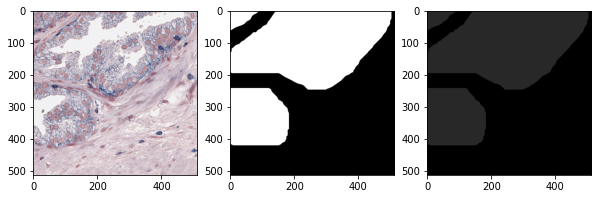

In [ ]:
cheak_img_data('/content/exist_512x512_partition_dataset', '10044_010')

### zip

In [ ]:
!zip exist_512x512_partition_dataset.zip -r ./exist_512x512_partition_dataset

## Exist mask 256x256 partition dataset

In [ ]:
!mkdir /content/exist_256x256_partition_dataset
!mkdir /content/exist_256x256_partition_dataset/images
!mkdir /content/exist_256x256_partition_dataset/binary_masks
!mkdir /content/exist_256x256_partition_dataset/multi_masks

In [ ]:
exist_dataset('/content/all_256x256_partition_dataset', '/content/exist_256x256_partition_dataset')

  0%|          | 0/22464 [00:00<?, ?it/s]

### Check dataset

Image len : 8763, Binary len : 8763, Multi len : 8763
10044_011
/content/exist_256x256_partition_dataset/images/10044_011.png


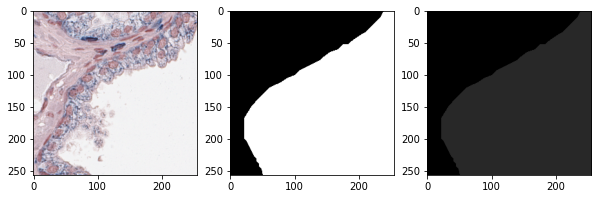

In [ ]:
cheak_img_data('/content/exist_256x256_partition_dataset', '10044_011')

### zip

In [ ]:
!zip exist_256x256_partition_dataset.zip -r ./exist_256x256_partition_dataset